In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Read in the public art data and examine the shape, head, and tail

In [92]:
art = pd.read_csv('../data/public_art.csv')
art.head(2)

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)"
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)"


In [93]:
art.tail(2)

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
130,Women Suffrage Memorial,LeQuire,Alan,"600 Charlotte Avenue, Nashville TN",Bronze sculpture,Sculpture,NaN,36.16527,-86.78382,"(36.16527, -86.78382)"
131,Youth Opportunity Center-STARS Nashville - Pea...,Rudloff,Andee,1704 Charlotte Ave.,House paint on vinyl,Mural,NaN,36.15896,-86.79900,"(36.15896, -86.799)"


In [94]:
art.shape

(132, 10)

### Let's explore these pandas methods, attributes, and accessors
 * .shape
 - .head()
 * .tail()
 - .columns
 - .drop()
 - .rename()
 - .query()
 - .loc[]
 - .iloc[]
 - [[]]

In [95]:
art.columns

Index(['Title', 'Last Name', 'First Name', 'Location', 'Medium', 'Type',
       'Description', 'Latitude', 'Longitude', 'Mapped Location'],
      dtype='object')

In [96]:
sculptures = art.query('Type == "Sculpture"')
sculptures.shape

(61, 10)

In [97]:
my_list = ['Sculpture', 'Mural']
sculptures_and_murals = art.query("Type in @my_list")
sculptures_and_murals.shape

(99, 10)

In [98]:
#art.loc[art.Type == 'Sculpture']
first_five = art.iloc[0:5, 1:3]

In [99]:
first_five

,Last Name,First Name
0,Frost,Miley
1,Walker,Lin
2,Kennedy,Kim
3,Stevenson and Stanley and ROFF (Harroff),Doug and Ronnica and Lynn
4,Ridley,Greg


In [72]:
artists = art[['Last Name', 'First Name']]
artists.head(2)

,Last Name,First Name
0,Frost,Miley
1,Walker,Lin


In [73]:
art = art.drop(columns = ['Mapped Location'])

In [74]:
art.columns

Index(['Title', 'Last Name', 'First Name', 'Location', 'Medium', 'Type',
       'Description', 'Latitude', 'Longitude'],
      dtype='object')

In [75]:
art.columns = ['title', 'last', 'first', 'loc', 'med',
              'type', 'desc', 'lat', 'lng']

In [76]:
art = art.rename(columns = {'Title': 'title', 'Last Name': 'last_name', 'First Name': 'first_name',
           'Location': 'loc', 'Medium': 'medium',  
            'Desccription': 'desc', 'Latiitude': 'lat', 'Longitude': 'lng'})

### More exploration with pandas
 - .value_counts()
 - .to_frame()
 - .reset_index()
 - .describe()
 - .info()
 - .isnull.sum()

#### matplotlib - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#examples-using-matplotlib-pyplot-plot


In [77]:
art.head(2)

,title,last,first,loc,med,type,desc,lat,lng
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774


In [78]:
type_counts = art.type.value_counts()

In [79]:
#make series a df
type_counts = type_counts.to_frame()

In [80]:
#reset index resets to 0-based index and moves existing index to a column
type_counts = type_counts.reset_index()

In [81]:
type_counts.columns = ['type', 'count']
type_counts.head(3)

,type,count
0,Sculpture,61
1,Mural,38
2,Monument,16


In [82]:
type(type_counts)

pandas.core.frame.DataFrame

In [83]:
type_counts.describe()

,count
count,16.000000
mean,8.250000
std,17.043083
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,61.000000


In [84]:
art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 9 columns):
title    132 non-null object
last     132 non-null object
first    122 non-null object
loc      131 non-null object
med      128 non-null object
type     132 non-null object
desc     87 non-null object
lat      132 non-null float64
lng      132 non-null float64
dtypes: float64(2), object(7)
memory usage: 9.4+ KB


In [85]:
art.isnull().sum()

title     0
last      0
first    10
loc       1
med       4
type      0
desc     45
lat       0
lng       0
dtype: int64

### Simplest horizontal barplot using matplotlib.pyplot

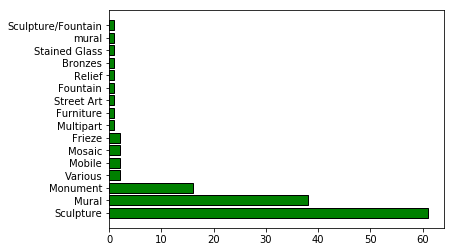

In [87]:
plt.barh('type', 'count', data=type_counts, color = 'green', edgecolor = 'black');

### Fancier horizontal barplot with seaborn

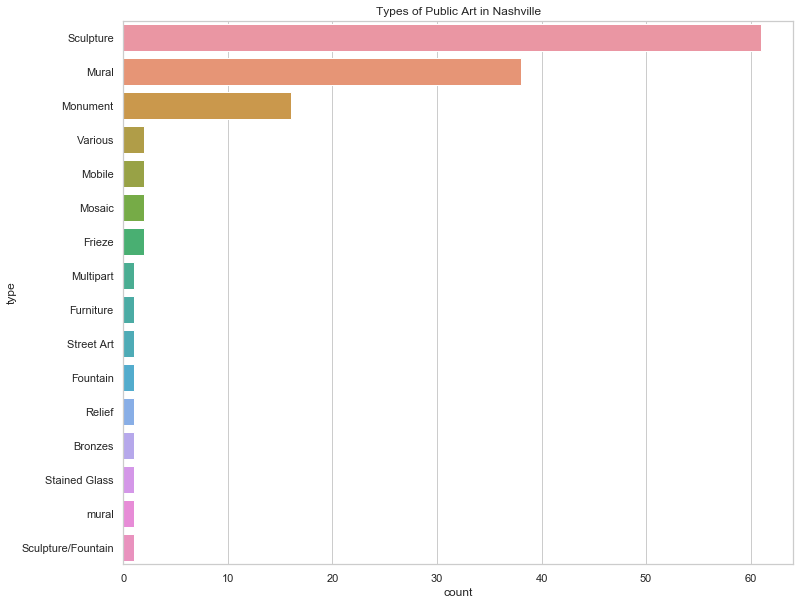

In [89]:
plt.figure(figsize = (12, 10))
sns.set(style="whitegrid")
sns.barplot('count', 'type', data = type_counts)
#plt.xlabel('')
#plt.ylabel('')
plt.title('Types of Public Art in Nashville');